<a href="https://colab.research.google.com/github/Tbot101/CIS-5190-Project/blob/main/Time_Shift_CIS_519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:


%cd /content/drive/Shareddrives/CIS\ 519\ Final\ Project

/content/drive/Shareddrives/CIS 519 Final Project


In [3]:
%ls
# 'Reviews.csv' should be listed here

'CIS 519 Project.ipynb'       'Project Milestone 2.gdoc'
 cleaned_reviews.csv          'Project Milestone 3.docx'
 fine-tuned-bert               res/
 James_CIS_519_Project.ipynb   Reviews.csv
 logs4/                       'Taha CIS 519 Project'
'Project 1 Milestone.gdoc'    'Time-Shift CIS 519 Project'


In [4]:
import pandas as pd
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

random.seed(42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
USE_CLEANED = True

In [6]:
# we need to use these parameters to read in some funky text
if USE_CLEANED:
  df = pd.read_csv('cleaned_reviews.csv', engine='python', on_bad_lines='skip')
else:
  df = pd.read_csv('Reviews.csv', engine='python', on_bad_lines='skip')
  df['sentiment'] = df.apply(lambda x: 1 if x['Score'] > 3 else 0, axis=1)
  df = df.sample(frac=0.2).reset_index(drop=True)
  def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    lemma = WordNetLemmatizer()
    result = [i for i in tokens if not i in stop_words]
    lemmatized_result = []
    for word in result:
      lemmatized_result.append(lemma.lemmatize(word))

    return " ".join(lemmatized_result)
  df['cleaned_text'] = df.apply(lambda x: preprocess_text(x['Text']), axis=1)

In [7]:
df = df.dropna()

In [8]:
df

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,cleaned_text
0,0,119814,B0009YUEG2,A2F09EWKV3MTO2,StillWaters,4,4,5,1303430400,This is all I ever use anymore,I love this litter because...<br />1. It compl...,1,love litter br 1 completely eliminates urine o...
1,1,290509,B004777F3M,A2PDNBEIQYRCT2,lmac60,0,0,4,1309996800,Good Tea!,Great flavor. Just enough spice. A love Chai...,1,great flavor enough spice love chai tea latte ...
2,2,489194,B002N2R7WM,A1CHGDG3NUDA5R,"C. Seggelin ""Plastered Dragon""",0,0,1,1350086400,Tasteless Fat For Your Popcorn! Just Use Butter.,"Y'know, you'd think with the words ""Buttery Fl...",0,know think word buttery flavor product name pr...
3,3,65205,B001D0GV5O,A3GIKK6DQEKEQK,CHERYL A. CATANZANO,0,0,1,1296777600,Very bland,I bought this tea because I like Timothy's Cof...,0,bought tea like timothy coffee product figured...
4,4,526585,B007PA30TG,A2XQSJG8YR6ED2,Cecilia f.,0,0,5,1303084800,great brew,i've been using these k-cups for months now. ...,1,using k cup month breakfast blend perfect peop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113686,113686,16241,B007TJGZ54,A1PLASEQUSPDPM,Chris,0,0,5,1339718400,Price is Right,Love the Green Mountain Coffee; tastes great i...,1,love green mountain coffee taste great keurig ...
113687,113687,511398,B001E6J07I,A233H2J16V56W8,"Claxon,Bill",0,0,5,1237507200,Tasty Carrs cracker,A super glamourized cheez-it without the trans...,1,super glamourized cheez without trans fat chol...
113688,113688,211139,B000X67P2C,A3G0H0GKJ0722I,C. Smith,10,13,1,1277164800,Did not like...,I had heard so many good things about using th...,0,heard many good thing using place wheat white ...
113689,113689,520860,B0009XSXZM,A3FTHCRY3EZNA7,categ3893,1,1,5,1333843200,8 month Golden Retriever is OBSESSED.,My adolescent golden retriever just loves thes...,1,adolescent golden retriever love soon see hold...


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_before = df.loc[df['Time'] <= 1311120000]
df_after = df.loc[df['Time'] > 1311120000]

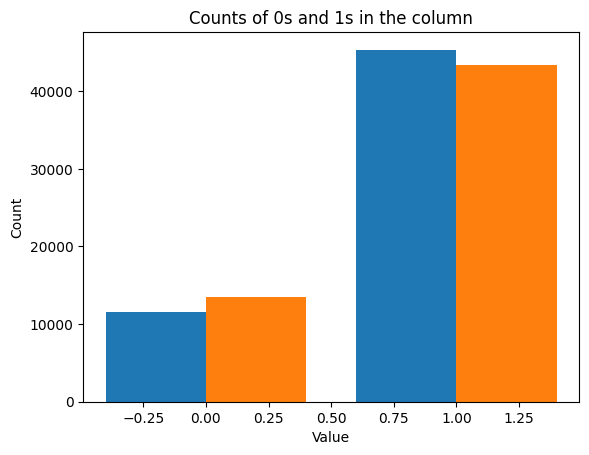

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

counts_before = df_before['sentiment'].value_counts()
counts_after = df_after['sentiment'].value_counts()

# Create a bar chart with the counts
plt.bar(counts_before.index - 0.2, counts_before.values, 0.4, label='Before')
plt.bar(counts_after.index + 0.2, counts_after.values, 0.4, label='After')

# Add labels to the chart
plt.title('Counts of 0s and 1s in the column')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the chart
plt.show()

In [43]:
counts_before

1    45342
0    11539
Name: sentiment, dtype: int64

In [44]:
counts_after

1    43366
0    13431
Name: sentiment, dtype: int64

In [11]:
train, _ = train_test_split(df_before)
_, test = train_test_split(df_after)

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
baseline = DummyClassifier(strategy="most_frequent")

In [14]:
baseline.fit(train.drop('sentiment', axis=1), train['sentiment'])

DummyClassifier(strategy='most_frequent')

In [15]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [16]:
baseline_predictions = baseline.predict(test.drop('sentiment', axis=1))
baseline_accuracy = accuracy_score(test['sentiment'], baseline_predictions)

In [17]:
baseline_f1score = f1_score(test['sentiment'], baseline_predictions)

In [18]:
def get_metrics(predictions, actual):
  accuracy = accuracy_score(actual, predictions)
  f1 = f1_score(actual, predictions)
  cross_entropy = log_loss(actual, predictions)
  print(f"Accuracy: {accuracy:.2f}")
  print(f"F1 Score: {f1:.2f}")
  print(f"Cross-Entropy: {cross_entropy:.2f}")

In [19]:
print("-- Baseline metrics --")
get_metrics(baseline_predictions, test['sentiment'])

-- Baseline metrics --
Accuracy: 0.76
F1 Score: 0.86
Cross-Entropy: 8.76


# Logistic Regression

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

seed = 42

def model_text(X_before, y_before, X_after, y_after, model, clf_model, desc):

  X_c_before = model.fit_transform(X_before)
  X_train, _, y_train, _ = train_test_split(X_c_before, y_before, random_state=seed)
  
  X_c_after = model.transform(X_after)
  _, X_test, _, y_test = train_test_split(X_c_after, y_after, random_state=seed)

  clf = clf_model.fit(X_train, y_train)

  # test accuracy
  clf_accuracy = clf.score(X_test, y_test)

  # f1 score
  preds = clf.predict(X_test)
  f1 = f1_score(y_test, preds)

  # cross entropy
  cross_entropy = log_loss(y_test, preds)

  print(f'MODEL: {desc}')
  print(f'test accuracy: {clf_accuracy:.2f}')
  print(f'f1 score: {f1:.2f}')
  print(f"Cross-Entropy: {cross_entropy:.2f}")
  print("\n")

  return (clf_accuracy, f1)


In [25]:
desc = 'Logistic Regression (No regulaization, CountVectorizer)\n'

c = CountVectorizer()

X_before = df_before['cleaned_text']
y_before = df_before['sentiment'] # if score > 3 then sentiment=1, 0 otherwise

X_after = df_after['cleaned_text']
y_after = df_after['sentiment'] 

clf_model = LogisticRegression(penalty=None)

model_text(X_before, y_before, X_after, y_after, c, clf_model, desc)

MODEL: Logistic Regression (No regulaization, CountVectorizer)

test accuracy: 0.84
f1 score: 0.90
Cross-Entropy: 5.74




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8407042253521126, 0.8973125113491919)

In [26]:
desc = 'Logistic Regression (L2 Regularization, CountVectorizer)\n'

clf_model = LogisticRegression(penalty='l2')
model_text(X_before, y_before, X_after, y_after, c, clf_model, desc)

MODEL: Logistic Regression (L2 Regularization, CountVectorizer)

test accuracy: 0.86
f1 score: 0.91
Cross-Entropy: 5.12




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8580281690140845, 0.9096288327057558)

In [27]:
desc = 'Logistic Regression (L2 Regularization, TFIDF + n-gram)\n'

tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
clf_model = LogisticRegression()
model_text(X_before, y_before, X_after, y_after, tfidf_n, clf_model, desc)

MODEL: Logistic Regression (L2 Regularization, TFIDF + n-gram)

test accuracy: 0.85
f1 score: 0.91
Cross-Entropy: 5.47




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8483098591549296, 0.90775950668037)

# Feedforward Neural Network

In [28]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np

In [29]:
class FFNN(nn.Module):

  def __init__(self, input_dim=40001, output_dim=2):
    super(FFNN, self).__init__()
    self.linear1 = nn.Linear(input_dim, 256) # 512
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(256, 32) # 128
    self.dropout = nn.Dropout(p=0.7) # 0.8
    self.dropout2 = nn.Dropout(p=0.7)
    self.linear3 = nn.Linear(32, output_dim)

  def forward(self, x):
    x = x.to(torch.float32)
    x = self.linear1(x)
    x = self.relu(x)
    x = self.dropout(x)

    x = self.linear2(x)
    x = self.relu(x)
    x = self.dropout2(x)

    output = self.linear3(x)
    return output

In [30]:
# tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
df_before_sample = df_before.sample(frac=0.8)
X_before_c = df_before_sample['cleaned_text']
cv = CountVectorizer()

df_after_sample = df_after.sample(frac=0.2)
X_after_c = df_after_sample['cleaned_text']

vec_X_before = cv.fit_transform(X_before_c)
vec_X_after = cv.transform(X_after_c)

y_before = np.array(df_before_sample['sentiment'].tolist())# if score > 3 then sentiment=1, 0 otherwise
y_after = np.array(df_after_sample['sentiment'].tolist())# if score > 3 then sentiment=1, 0 otherwise

vec_X_train, _, y_train, _ = train_test_split(vec_X_before, y_before, test_size=0.15)
_, vec_X_test, _, y_test = train_test_split(vec_X_after, y_after, test_size=0.15)

In [31]:
df['sentiment'].describe()

count    113678.000000
mean          0.780344
std           0.414015
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sentiment, dtype: float64

In [32]:
model = FFNN(vec_X_train.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [33]:
import numpy as np
from tqdm import tqdm

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 8
batch_size = 256
num_batches = vec_X_train.shape[0] // batch_size

prev_accuracy = 0
for epoch in range(num_epochs):
    
    model.train()
    running_loss = 0.
    correct, total = 0, 0 

    for i in tqdm(range(num_batches)):
        start = i * batch_size
        end = (i + 1) * batch_size
        text = torch.tensor(vec_X_train[start:end].toarray())
        label = torch.tensor(y_train[start:end]).cuda()

        # 1. Store the inputs and labels in the GPU
        text = text.to(device)
        label = label.to(device)
        # 2. Get the model predictions
        predictions = model(text)

        # 3. Zero the gradients out
        optimizer.zero_grad()
        # 4. Get the loss
        loss = criterion(predictions, label)

        # 5. Calculate the gradients
        loss.backward()

        # 6. Update the weights
        optimizer.step()
            
        running_loss += loss.item()
        
        _, predicted = torch.max(predictions, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
    curr_accuracy = float(correct) / float(total)
    print(f"Accuracy {curr_accuracy}")
    print(f"Loss: {running_loss / total}")

    if abs(curr_accuracy - prev_accuracy) < 0.005:
      print("Breaking early due to converging accuracy")
      break
    prev_accuracy = curr_accuracy
    running_loss = 0.0
    
        

100%|██████████| 151/151 [00:15<00:00,  9.52it/s]


Accuracy 0.7901231374172185
Loss: 0.001757955184015168


100%|██████████| 151/151 [00:13<00:00, 11.51it/s]


Accuracy 0.882890107615894
Loss: 0.0011779162924835421


100%|██████████| 151/151 [00:14<00:00, 10.76it/s]


Accuracy 0.9085523592715232
Loss: 0.0009611394022751772


100%|██████████| 151/151 [00:13<00:00, 11.44it/s]


Accuracy 0.9249534354304636
Loss: 0.0008061709399381344


100%|██████████| 151/151 [00:13<00:00, 11.41it/s]


Accuracy 0.941483857615894
Loss: 0.0006597437404345919


100%|██████████| 151/151 [00:13<00:00, 11.49it/s]


Accuracy 0.9521678394039735
Loss: 0.000552421627490664


100%|██████████| 151/151 [00:13<00:00, 11.46it/s]


Accuracy 0.9615842301324503
Loss: 0.00045909879544891714


100%|██████████| 151/151 [00:13<00:00, 11.38it/s]

Accuracy 0.9674565397350994
Loss: 0.00039217409805783276


In [35]:
model.eval()

FFNN(
  (linear1): Linear(in_features=34993, out_features=256, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=256, out_features=32, bias=True)
  (dropout): Dropout(p=0.7, inplace=False)
  (dropout2): Dropout(p=0.7, inplace=False)
  (linear3): Linear(in_features=32, out_features=2, bias=True)
)

In [36]:
test_predictions = model(torch.tensor(vec_X_test.toarray()).to(device))

In [37]:
test_predictions = test_predictions.cpu().detach().numpy()

In [38]:
pred = np.argmax(test_predictions, axis=1)

In [39]:
get_metrics(pred, y_test)

Accuracy: 0.86
F1 Score: 0.91
Cross-Entropy: 5.06
